## Data Preperation

In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.reset_option('max_rows')


In [14]:
# Columns relevant to the time-series analysis
columns_to_load = [
    'date', 'subregion2_name', 'subregion1_name',
    'new_confirmed', 'new_deceased',
    'cumulative_confirmed', 'cumulative_deceased',
    'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated',
    'population',
    'average_temperature_celsius', 'minimum_temperature_celsius',
    'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity'
]

# Directory path to CSV files
directory_path = "../Test CSVs/"  

# Initialize an empty DataFrame to store data from all CSV files
full_df = pd.DataFrame()

# Efficiently load CSV files
for file in glob.glob(directory_path + '*.csv'):
    df = pd.read_csv(file, usecols=lambda column: column in columns_to_load)
    full_df = pd.concat([full_df, df], ignore_index=True)

full_df.reset_index(drop=True, inplace=True)


In [15]:
# Convert 'date' to datetime and setup time-based grouping
full_df['date'] = pd.to_datetime(full_df['date'])
full_df['week'] = full_df['date'] - pd.to_timedelta(full_df['date'].dt.weekday, unit='d')
full_df['county_name'] = full_df['subregion2_name'] + ', ' + full_df['subregion1_name']

# Define columns to keep for analysis
columns_to_keep = [
    'county_name', 'week', 'date', 'new_confirmed', 'new_deceased',
    'cumulative_confirmed', 'cumulative_deceased',
    'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated',
    'population', 'average_temperature_celsius', 'minimum_temperature_celsius',
    'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity'
]

full_df = full_df[columns_to_keep]

# Group by 'county_name' and 'week', aggregate relevant metrics
aggregations = {
    'new_confirmed': 'sum', 'new_deceased': 'sum',
    'cumulative_confirmed': 'max', 'cumulative_deceased': 'max',
    'new_persons_fully_vaccinated': 'sum', 'cumulative_persons_fully_vaccinated': 'max',
    'population': 'mean', 'average_temperature_celsius': 'mean',
    'minimum_temperature_celsius': 'mean', 'maximum_temperature_celsius': 'mean',
    'rainfall_mm': 'sum', 'relative_humidity': 'mean'
}

weekly_df = full_df.groupby(['county_name', 'week']).agg(aggregations).reset_index()
weekly_df['description'] = weekly_df['county_name'] + " - Week of " + weekly_df['week'].dt.strftime('%Y-%m-%d')



In [16]:
# Normalization by population
normalize_columns = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated'
]

# Normalization by population per 1000
def normalize_by_population_per_1000(df, columns):
    for col in columns:
        df[f'{col}_per_1000'] = df[col] / df['population'] * 1000
    return df

# Apply normalization per 1000
weekly_df = normalize_by_population_per_1000(weekly_df, normalize_columns)


# Normalization by population per 100
def normalize_by_population_per_100(df, columns):
    for col in columns:
        df[f'{col}_per_100'] = df[col] / df['population'] * 100
    return df

# Apply normalization per 100
weekly_df = normalize_by_population_per_100(weekly_df, normalize_columns)


In [17]:
# Display the first 5 rows of the DataFrame
display(weekly_df.head())

# Display the last 5 rows of the DataFrame
display(weekly_df.tail())


,county_name,week,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,description,new_confirmed_per_1000,new_deceased_per_1000,cumulative_confirmed_per_1000,cumulative_deceased_per_1000,new_persons_fully_vaccinated_per_1000,cumulative_persons_fully_vaccinated_per_1000,new_confirmed_per_100,new_deceased_per_100,cumulative_confirmed_per_100,cumulative_deceased_per_100,new_persons_fully_vaccinated_per_100,cumulative_persons_fully_vaccinated_per_100
0,"Adams County, Colorado",2019-12-30,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,2.713334,-4.903333,10.976790,0.000000,43.757030,"Adams County, Colorado - Week of 2019-12-30",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
1,"Adams County, Colorado",2020-01-06,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,0.588095,-6.238889,8.563492,0.000000,43.450591,"Adams County, Colorado - Week of 2020-01-06",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
2,"Adams County, Colorado",2020-01-13,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,-0.452381,-7.979365,8.264286,0.000000,41.711824,"Adams County, Colorado - Week of 2020-01-13",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
3,"Adams County, Colorado",2020-01-20,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,2.561565,-4.450340,11.145692,0.000000,42.763934,"Adams County, Colorado - Week of 2020-01-20",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
4,"Adams County, Colorado",2020-01-27,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,3.066667,-4.392857,11.653616,1.200453,48.735622,"Adams County, Colorado - Week of 2020-01-27",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN


,county_name,week,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,description,new_confirmed_per_1000,new_deceased_per_1000,cumulative_confirmed_per_1000,cumulative_deceased_per_1000,new_persons_fully_vaccinated_per_1000,cumulative_persons_fully_vaccinated_per_1000,new_confirmed_per_100,new_deceased_per_100,cumulative_confirmed_per_100,cumulative_deceased_per_100,new_persons_fully_vaccinated_per_100,cumulative_persons_fully_vaccinated_per_100
58641,"Yuma County, Colorado",2022-08-15,0.0,0.0,NaN,NaN,1.0,4476.0,9959.0,22.316667,14.610318,31.771428,4.080329,55.260483,"Yuma County, Colorado - Week of 2022-08-15",0.0,0.0,NaN,NaN,0.100412,449.442715,0.0,0.0,NaN,NaN,0.010041,44.944272
58642,"Yuma County, Colorado",2022-08-22,0.0,0.0,NaN,NaN,0.0,4476.0,9959.0,23.825397,13.609524,33.813492,2.394857,38.153665,"Yuma County, Colorado - Week of 2022-08-22",0.0,0.0,NaN,NaN,0.000000,449.442715,0.0,0.0,NaN,NaN,0.000000,44.944272
58643,"Yuma County, Colorado",2022-08-29,0.0,0.0,NaN,NaN,0.0,NaN,9959.0,23.581129,13.655379,34.371605,1.320901,39.698171,"Yuma County, Colorado - Week of 2022-08-29",0.0,0.0,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,NaN,0.000000,NaN
58644,"Yuma County, Colorado",2022-09-05,0.0,0.0,NaN,NaN,11.0,4487.0,9959.0,21.013404,11.675926,32.332716,0.464457,42.166975,"Yuma County, Colorado - Week of 2022-09-05",0.0,0.0,NaN,NaN,1.104529,450.547244,0.0,0.0,NaN,NaN,0.110453,45.054724
58645,"Yuma County, Colorado",2022-09-12,0.0,0.0,NaN,NaN,0.0,4487.0,9959.0,20.477778,10.480093,31.666204,0.000000,30.227457,"Yuma County, Colorado - Week of 2022-09-12",0.0,0.0,NaN,NaN,0.000000,450.547244,0.0,0.0,NaN,NaN,0.000000,45.054724


In [18]:
# Display statistical summaries of the DataFrame
display(weekly_df.describe())


,week,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,new_confirmed_per_1000,new_deceased_per_1000,cumulative_confirmed_per_1000,cumulative_deceased_per_1000,new_persons_fully_vaccinated_per_1000,cumulative_persons_fully_vaccinated_per_1000,new_confirmed_per_100,new_deceased_per_100,cumulative_confirmed_per_100,cumulative_deceased_per_100,new_persons_fully_vaccinated_per_100,cumulative_persons_fully_vaccinated_per_100
count,58646,58646.000000,58646.000000,4.645700e+04,46457.000000,58646.000000,2.973600e+04,5.864600e+04,58362.000000,58362.000000,58362.000000,58646.000000,58220.000000,58646.000000,58646.000000,46457.000000,46457.000000,58646.000000,29736.000000,58646.000000,58646.000000,46457.000000,46457.000000,58646.000000,29736.000000
mean,2021-05-06 11:59:59.999999744,433.767691,4.647938,2.446267e+04,361.256129,714.909406,1.452746e+05,2.388880e+05,13.794829,7.991184,20.509017,13.364230,64.973797,1.748559,0.020266,96.394349,1.319876,2.330923,514.071005,0.174856,0.002027,9.639435,0.131988,0.233092,51.407101
min,2019-12-30 00:00:00,-4698.000000,-511.000000,0.000000e+00,0.000000,-42830.000000,0.000000e+00,7.120000e+02,-23.488536,-29.620282,-18.399581,0.000000,13.371121,-65.908067,-2.808989,0.000000,0.000000,-365.417564,0.000000,-6.590807,-0.280899,0.000000,0.000000,-36.541756,0.000000
25%,2020-08-31 00:00:00,0.000000,0.000000,7.280000e+02,10.000000,0.000000,9.826500e+03,2.096300e+04,6.813691,0.877827,13.790476,1.163109,57.607140,0.000000,0.000000,19.407228,0.262350,0.000000,419.503790,0.000000,0.000000,1.940723,0.026235,0.000000,41.950379
50%,2021-05-06 12:00:00,33.000000,0.000000,3.710000e+03,55.000000,0.000000,2.848950e+04,5.937200e+04,15.540476,9.151565,22.644731,7.077428,68.091662,0.680788,0.000000,84.938182,1.061669,0.000000,524.246794,0.068079,0.000000,8.493818,0.106167,0.000000,52.424679
75%,2022-01-10 00:00:00,194.000000,2.000000,1.428600e+04,193.000000,141.000000,1.010975e+05,1.793840e+05,21.728175,15.623876,28.473942,19.064161,75.515447,2.118598,0.020369,144.545431,1.978258,2.490750,618.475250,0.211860,0.002037,14.454543,0.197826,0.249075,61.847525
max,2022-09-12 00:00:00,290059.000000,1598.000000,2.908425e+06,32022.000000,397988.000000,7.388754e+06,1.010371e+07,36.333399,28.552381,45.451764,283.453416,95.002148,98.000465,2.808989,573.116438,8.281938,396.067416,983.146067,9.800047,0.280899,57.311644,0.828194,39.606742,98.314607
std,NaN,3040.389655,30.223746,9.547708e+04,1396.959548,5163.069160,4.267088e+05,6.562087e+05,9.811460,9.879139,10.070110,17.389080,14.506106,3.119772,0.061260,83.670896,1.238196,7.123526,160.712624,0.311977,0.006126,8.367090,0.123820,0.712353,16.071262


In [19]:
# Display data types and non-null counts
display(weekly_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58646 entries, 0 to 58645
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   county_name                                   58646 non-null  object        
 1   week                                          58646 non-null  datetime64[ns]
 2   new_confirmed                                 58646 non-null  float64       
 3   new_deceased                                  58646 non-null  float64       
 4   cumulative_confirmed                          46457 non-null  float64       
 5   cumulative_deceased                           46457 non-null  float64       
 6   new_persons_fully_vaccinated                  58646 non-null  float64       
 7   cumulative_persons_fully_vaccinated           29736 non-null  float64       
 8   population                                    58646 non-null  floa

None

In [8]:
# Display the number of unique counties
print("Unique counties:", weekly_df['county_name'].nunique())

# Display unique values in another column of interest
print("Unique weeks sampled:", weekly_df['week'].nunique())


Unique counties: 413
Unique weeks sampled: 142


In [20]:
# Display a random sample of 5 rows from the DataFrame
display(weekly_df.sample(5))


,county_name,week,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,description,new_confirmed_per_1000,new_deceased_per_1000,cumulative_confirmed_per_1000,cumulative_deceased_per_1000,new_persons_fully_vaccinated_per_1000,cumulative_persons_fully_vaccinated_per_1000,new_confirmed_per_100,new_deceased_per_100,cumulative_confirmed_per_100,cumulative_deceased_per_100,new_persons_fully_vaccinated_per_100,cumulative_persons_fully_vaccinated_per_100
40481,"Plumas County, California",2020-03-16,0.0,0.0,NaN,NaN,0.0,NaN,18660.0,4.567901,-0.450794,10.107496,12.359217,74.463538,"Plumas County, California - Week of 2020-03-16",0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
37761,"Otero County, Colorado",2022-07-04,0.0,0.0,NaN,NaN,6.0,9105.0,18345.0,25.616667,16.145238,34.897178,12.827000,42.562456,"Otero County, Colorado - Week of 2022-07-04",0.000000,0.000000,NaN,NaN,0.327065,496.320523,0.000000,0.000000,NaN,NaN,0.032706,49.632052
47535,"Schuyler County, New York",2022-01-17,159.0,0.0,3098.0,23.0,52.0,10821.0,17913.0,-7.196825,-12.865079,-0.978571,20.701000,69.094008,"Schuyler County, New York - Week of 2022-01-17",8.876235,0.000000,172.947022,1.283984,2.902920,604.086418,0.887624,0.000000,17.294702,0.128398,0.290292,60.408642
7019,"Charlotte County, Florida",2021-03-01,152.0,7.0,10836.0,373.0,0.0,NaN,181522.0,20.105556,16.042857,25.339682,7.696200,73.628074,"Charlotte County, Florida - Week of 2021-03-01",0.837364,0.038563,59.695244,2.054847,0.000000,NaN,0.083736,0.003856,5.969524,0.205485,0.000000,NaN
48480,"Sheboygan County, Wisconsin",2021-02-08,123.0,1.0,13362.0,133.0,0.0,NaN,115089.0,-16.625397,-19.839682,-13.280952,0.183444,61.554403,"Sheboygan County, Wisconsin - Week of 2021-02-08",1.068738,0.008689,116.101452,1.155627,0.000000,NaN,0.106874,0.000869,11.610145,0.115563,0.000000,NaN


In [23]:
# Check available columns and sample data to confirm normalization
print(weekly_df.columns)
display(weekly_df.head())

Index(['county_name', 'week', 'new_confirmed', 'new_deceased',
       'cumulative_confirmed', 'cumulative_deceased',
       'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated',
       'population', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'description',
       'new_confirmed_per_1000', 'new_deceased_per_1000',
       'cumulative_confirmed_per_1000', 'cumulative_deceased_per_1000',
       'new_persons_fully_vaccinated_per_1000',
       'cumulative_persons_fully_vaccinated_per_1000', 'new_confirmed_per_100',
       'new_deceased_per_100', 'cumulative_confirmed_per_100',
       'cumulative_deceased_per_100', 'new_persons_fully_vaccinated_per_100',
       'cumulative_persons_fully_vaccinated_per_100'],
      dtype='object')


,county_name,week,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,description,new_confirmed_per_1000,new_deceased_per_1000,cumulative_confirmed_per_1000,cumulative_deceased_per_1000,new_persons_fully_vaccinated_per_1000,cumulative_persons_fully_vaccinated_per_1000,new_confirmed_per_100,new_deceased_per_100,cumulative_confirmed_per_100,cumulative_deceased_per_100,new_persons_fully_vaccinated_per_100,cumulative_persons_fully_vaccinated_per_100
0,"Adams County, Colorado",2019-12-30,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,2.713334,-4.903333,10.976790,0.000000,43.757030,"Adams County, Colorado - Week of 2019-12-30",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
1,"Adams County, Colorado",2020-01-06,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,0.588095,-6.238889,8.563492,0.000000,43.450591,"Adams County, Colorado - Week of 2020-01-06",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
2,"Adams County, Colorado",2020-01-13,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,-0.452381,-7.979365,8.264286,0.000000,41.711824,"Adams County, Colorado - Week of 2020-01-13",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
3,"Adams County, Colorado",2020-01-20,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,2.561565,-4.450340,11.145692,0.000000,42.763934,"Adams County, Colorado - Week of 2020-01-20",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
4,"Adams County, Colorado",2020-01-27,0.0,0.0,NaN,NaN,0.0,NaN,503590.0,3.066667,-4.392857,11.653616,1.200453,48.735622,"Adams County, Colorado - Week of 2020-01-27",0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN


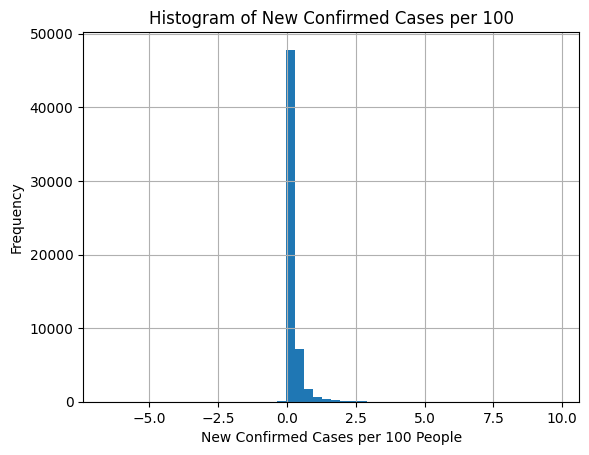

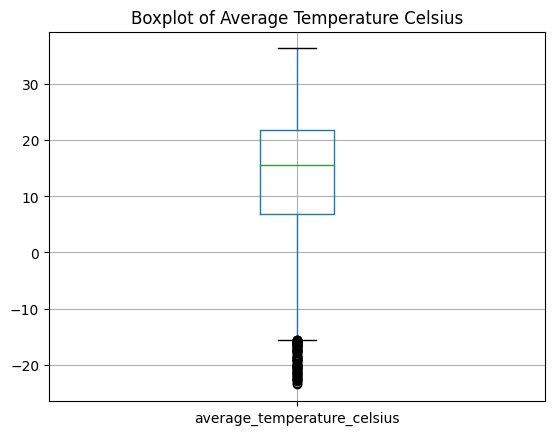

In [24]:
# Histogram of new confirmed cases per 100
weekly_df['new_confirmed_per_100'].hist(bins=50)
plt.title('Histogram of New Confirmed Cases per 100')
plt.xlabel('New Confirmed Cases per 100 People')
plt.ylabel('Frequency')
plt.show()

# Boxplot for average temperature
weekly_df.boxplot(column='average_temperature_celsius')
plt.title('Boxplot of Average Temperature Celsius')
plt.show()


## Statistical Analysis

In [25]:
# Calculate Pearson correlation coefficients
correlation_matrix = weekly_df[[
    'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius',
    'rainfall_mm', 'relative_humidity',
    'new_confirmed_per_1000', 'new_deceased_per_1000',
    'cumulative_confirmed_per_1000', 'cumulative_deceased_per_1000'
]].corr()

# Display the correlation matrix
display(correlation_matrix)


,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity,new_confirmed_per_1000,new_deceased_per_1000,cumulative_confirmed_per_1000,cumulative_deceased_per_1000
average_temperature_celsius,1.000000,0.982607,0.983389,0.208738,0.064667,-0.281052,-0.098584,-0.245601,-0.093393
minimum_temperature_celsius,0.982607,1.000000,0.935775,0.276166,0.213974,-0.264266,-0.087150,-0.245778,-0.090219
maximum_temperature_celsius,0.983389,0.935775,1.000000,0.147149,-0.071128,-0.280901,-0.103459,-0.235484,-0.092581
rainfall_mm,0.208738,0.276166,0.147149,1.000000,0.451087,-0.041174,0.006372,-0.088575,-0.038187
relative_humidity,0.064667,0.213974,-0.071128,0.451087,1.000000,0.064421,0.056624,-0.022511,0.039237
new_confirmed_per_1000,-0.281052,-0.264266,-0.280901,-0.041174,0.064421,1.000000,0.200409,0.286359,0.174981
new_deceased_per_1000,-0.098584,-0.087150,-0.103459,0.006372,0.056624,0.200409,1.000000,0.097589,0.166439
cumulative_confirmed_per_1000,-0.245601,-0.245778,-0.235484,-0.088575,-0.022511,0.286359,0.097589,1.000000,0.776992
cumulative_deceased_per_1000,-0.093393,-0.090219,-0.092581,-0.038187,0.039237,0.174981,0.166439,0.776992,1.000000


In [26]:
import statsmodels.api as sm

# Prepare the independent variables with a constant added (for the intercept)
X = weekly_df[[
    'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius',
    'rainfall_mm', 'relative_humidity'
]]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Example dependent variable: new_confirmed_per_1000
y = weekly_df['new_confirmed_per_1000']

# Fit the regression model
model = sm.OLS(y, X, missing='drop')  # 'drop' automatically excludes NaNs
results = model.fit()

# Display the regression results
print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     new_confirmed_per_1000   R-squared:                       0.093
Model:                                OLS   Adj. R-squared:                  0.093
Method:                     Least Squares   F-statistic:                     1196.
Date:                    Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                            14:28:53   Log-Likelihood:            -1.4603e+05
No. Observations:                   58220   AIC:                         2.921e+05
Df Residuals:                       58214   BIC:                         2.921e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# Overview of Key Components

## Dependent Variable: new_confirmed_per_1000
This variable represents what the model is trying to predict: the number of new confirmed COVID-19 cases per 1000 people.

## Model Fit Statistics
- **R-squared:** 0.093. This value indicates that about 9.3% of the variability in new confirmed cases per 1000 people can be explained by the model's inputs (weather conditions). Although this is not very high, it is typical for complex phenomena like disease spread where many unmodeled factors may influence the outcomes.
- **Adj. R-squared:** Also 0.093, adjusted for the number of predictors, suggesting the model isn't overfit with unnecessary variables.
- **F-statistic and Prob (F-statistic):** The F-statistic is 1196, and the associated probability is virtually 0. This suggests that the model is statistically significant – that is, it is highly unlikely that these results are from a model with no relationship between the variables at all.

## Coefficients
- **const:** The intercept is 1.0268. If all predictor variables were zero, there would be approximately 1.027 new confirmed cases per 1000 people, according to the model.
- **average_temperature_celsius:** Each degree increase in average temperature is associated with a decrease of 0.7067 in the number of new confirmed cases per 1000 people, significant at p < 0.000.
- **minimum_temperature_celsius:** Each degree increase in minimum temperature correlates with an increase of 0.2860 in new cases per 1000, which is statistically significant.
- **maximum_temperature_celsius:** Similarly, each degree increase in maximum temperature shows an increase of 0.3313 in new cases per 1000, also significant.
- **rainfall_mm:** Each millimeter increase in rainfall is associated with a decrease of 0.0058 in new cases per 1000, significant at p < 0.000.
- **relative_humidity:** Each percentage increase in humidity is associated with an increase of 0.0226 in new cases per 1000, significant at p < 0.000.

## Model Diagnostics
- **Durbin-Watson:** At 0.408, this statistic indicates a positive autocorrelation in the residuals of the regression, suggesting that the model might be missing important information that unfolds over time (e.g., time lags, seasonality).
- **Omnibus/Prob(Omnibus):** Tests the skewness and kurtosis of the residuals. A significant value (close to 0) suggests that the residuals are not normally distributed.
- **Jarque-Bera (JB)/Prob(JB):** Also tests whether the residuals are normally distributed. The large JB statistic and its low probability confirm that the residuals are not normally distributed, indicating potential issues with the model's assumptions.
- **Skew:** Positive value (4.638) indicates a right-skewed distribution of residuals.
- **Kurtosis:** Very high kurtosis (67.225) indicates a peaky distribution, with residuals clustering around a central point more than in a normal distribution and with larger outliers.

## Interpretation
While the model does find statistically significant relationships between weather conditions and COVID-19 cases, the overall explanatory power (R-squared) is low, suggesting that while these factors are relevant, there are many other factors at play affecting COVID-19 case rates that are not included in the model. Moreover, the diagnostics indicate some potential issues with how well the model meets the assumptions of linear regression, particularly concerning the distribution of residuals.

These results suggest that further refinement of the model could be beneficial. This might include adding other variables, examining non-linear relationships, or using different types of models better suited for time series data and accounting for autocorrelation and non-normal distributions of error terms.


In [27]:
# Create lagged variables for cases and weather conditions
weekly_df['lagged_new_confirmed_per_1000'] = weekly_df['new_confirmed_per_1000'].shift(1)  # One week lag
weekly_df['lagged_avg_temp'] = weekly_df['average_temperature_celsius'].shift(1)

# Update the model setup
X = weekly_df[['average_temperature_celsius', 'minimum_temperature_celsius',
               'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
               'lagged_new_confirmed_per_1000', 'lagged_avg_temp']]
X = sm.add_constant(X)  # adds a constant term to the predictor
y = weekly_df['new_confirmed_per_1000']

# Fit the new model
model = sm.OLS(y, X, missing='drop')  # 'drop' automatically excludes NaNs
results = model.fit()
print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     new_confirmed_per_1000   R-squared:                       0.685
Model:                                OLS   Adj. R-squared:                  0.684
Method:                     Least Squares   F-statistic:                 1.804e+04
Date:                    Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                            14:36:23   Log-Likelihood:            -1.1529e+05
No. Observations:                   58217   AIC:                         2.306e+05
Df Residuals:                       58209   BIC:                         2.307e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

# Model Fit and Statistical Significance

## R-squared and Adjusted R-squared
The R-squared value has increased dramatically to 0.685, indicating that approximately 68.5% of the variability in new confirmed COVID-19 cases per 1000 people is explained by the model. This is a significant improvement, highlighting the importance of including lagged variables in predicting COVID-19 cases. The Adjusted R-squared is similarly high, adjusting for the number of predictors in the model, ensuring the model isn't just fitting noise.

## F-statistic and Prob (F-statistic)
The F-statistic is extremely high (18040), and the probability of the F-statistic is essentially 0, which indicates that the model is highly statistically significant. This means we can be very confident that the model provides a better fit than a model with no independent variables.

## Coefficients
- **const:** The intercept is 0.1551, which suggests that when all other variables are held at zero, the expected number of new confirmed cases per 1000 people would start at 0.1551. The p-value for the intercept suggests that it is not statistically significant (p = 0.095).

## Weather Variables
- **average_temperature_celsius:** For every one degree Celsius increase in average temperature, there is a decrease of about 0.1516 in new confirmed cases per 1000 people, suggesting that higher temperatures might be associated with fewer cases.
- **minimum_temperature_celsius and maximum_temperature_celsius:** Both show a small positive effect on the number of new cases, which is statistically significant.
- **rainfall_mm:** A slight decrease in case numbers with more rainfall, though the effect size is very small.
- **relative_humidity:** A slight increase in case numbers with higher humidity, also statistically significant.

## Lagged Variables
- **lagged_new_confirmed_per_1000:** This has the most substantial impact on the model, with a coefficient of 0.8125. This indicates a strong autocorrelation in COVID-19 cases week-over-week, meaning last week's cases are a strong predictor of this week's cases.
- **lagged_avg_temp:** Shows a smaller positive impact, indicating that last week's average temperature also influences the number of new cases.

## Diagnostics
- **Durbin-Watson:** The statistic is 1.831, which suggests that there is a minimal autocorrelation in the residuals of the regression model, a good improvement from the previous model.
- **Omnibus/Prob(Omnibus) and Jarque-Bera (JB)/Prob(JB):** These tests indicate that the residuals are not normally distributed (extremely skewed and peaky). The very high values suggest issues with outliers or an inappropriate model specification for capturing all the underlying patterns in the data.

## Interpretation and Next Steps
The inclusion of lagged variables significantly improves the model's accuracy, emphasizing the importance of temporal dynamics in the spread of COVID-19. Despite the good fit, the distribution of residuals suggests that the model might still be improved, perhaps by considering nonlinear effects or different types of statistical models (like Generalized Linear Models or time-series specific models). Investigating and possibly addressing outliers or leveraging a transformation of the dependent variable or a different error distribution (like Poisson or negative binomial, often used in count data scenarios) could provide better results. Additional variables and potentially more granular time lags (e.g., two weeks back, three weeks back) could further improve model performance, especially in capturing longer-term trends or delayed effects of weather on virus transmission.


## Visualiztion 

### Time Series Lines Plots

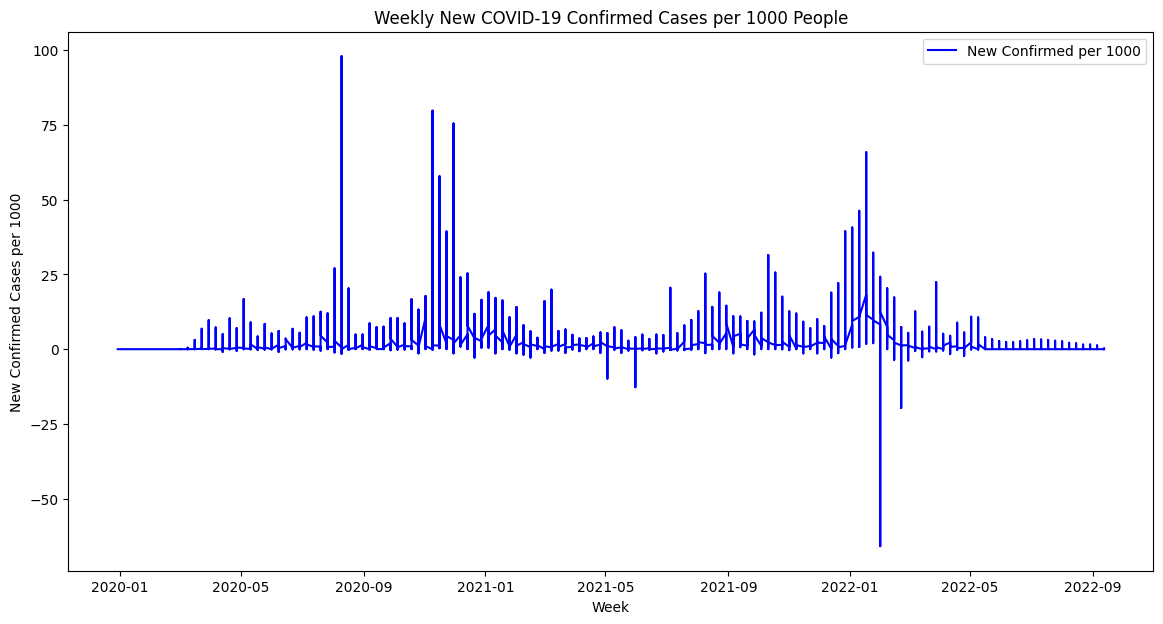

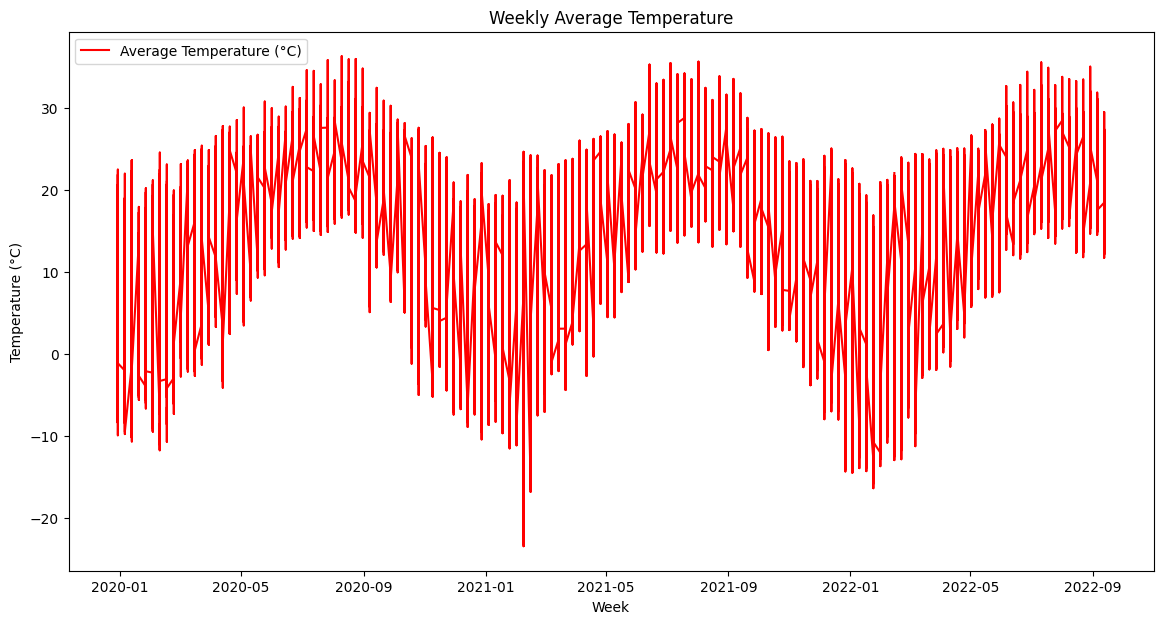

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is sorted by date if not already
weekly_df.sort_values('week', inplace=True)

# Plotting new confirmed cases over time
plt.figure(figsize=(14, 7))
plt.plot(weekly_df['week'], weekly_df['new_confirmed_per_1000'], label='New Confirmed per 1000', color='b')
plt.title('Weekly New COVID-19 Confirmed Cases per 1000 People')
plt.xlabel('Week')
plt.ylabel('New Confirmed Cases per 1000')
plt.legend()
plt.show()

# Plotting average temperature over time
plt.figure(figsize=(14, 7))
plt.plot(weekly_df['week'], weekly_df['average_temperature_celsius'], label='Average Temperature (°C)', color='r')
plt.title('Weekly Average Temperature')
plt.xlabel('Week')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### Scatter Plot with Regression Line

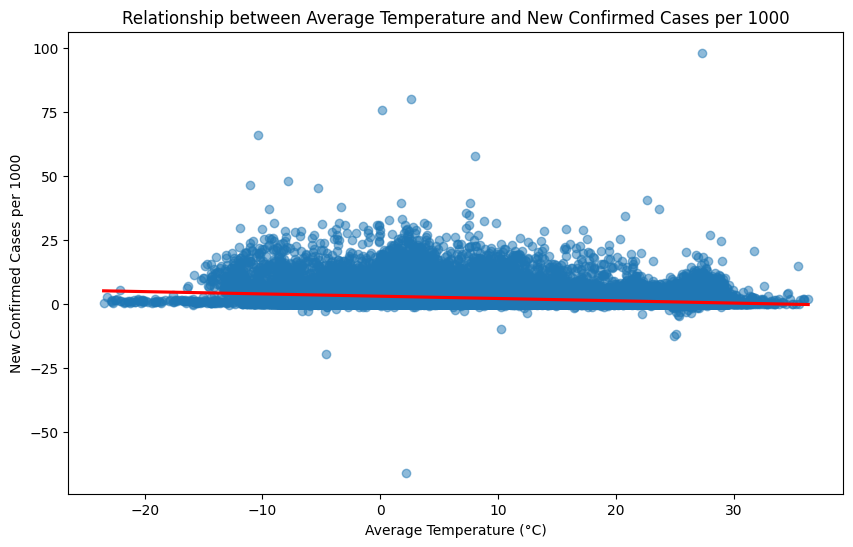

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='average_temperature_celsius', y='new_confirmed_per_1000', data=weekly_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Average Temperature and New Confirmed Cases per 1000')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('New Confirmed Cases per 1000')
plt.show()


### Multiple Time Series on One Plot

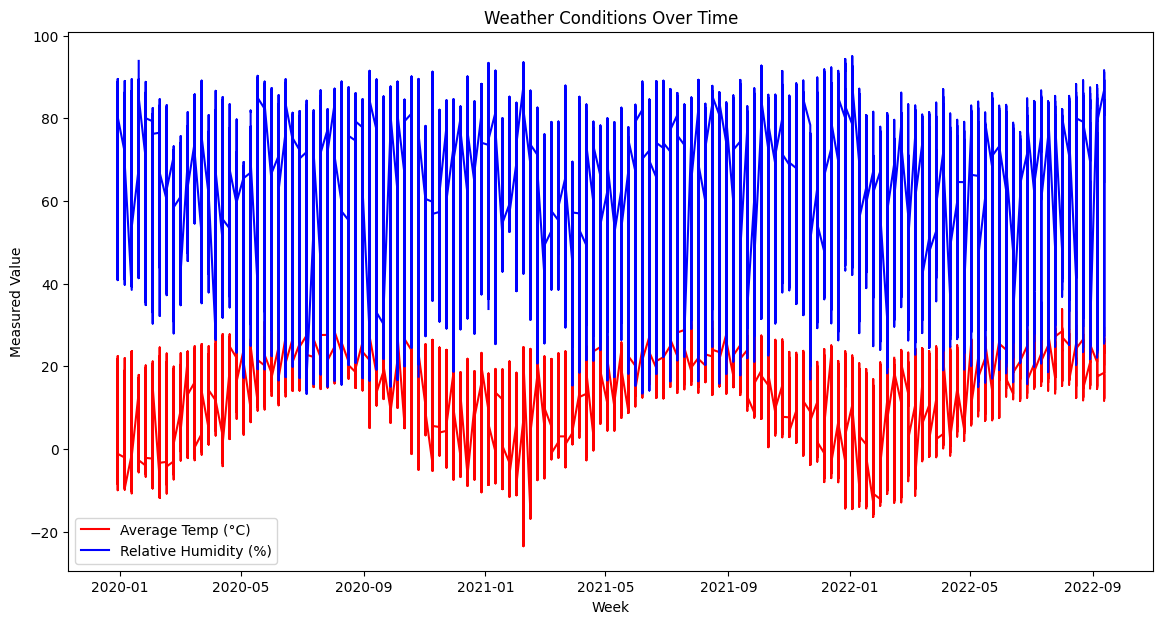

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_df['week'], weekly_df['average_temperature_celsius'], label='Average Temp (°C)', color='red')
plt.plot(weekly_df['week'], weekly_df['relative_humidity'], label='Relative Humidity (%)', color='blue')
plt.title('Weather Conditions Over Time')
plt.xlabel('Week')
plt.ylabel('Measured Value')
plt.legend()
plt.show()

### Heatmaps of Yearly/Monthly Data

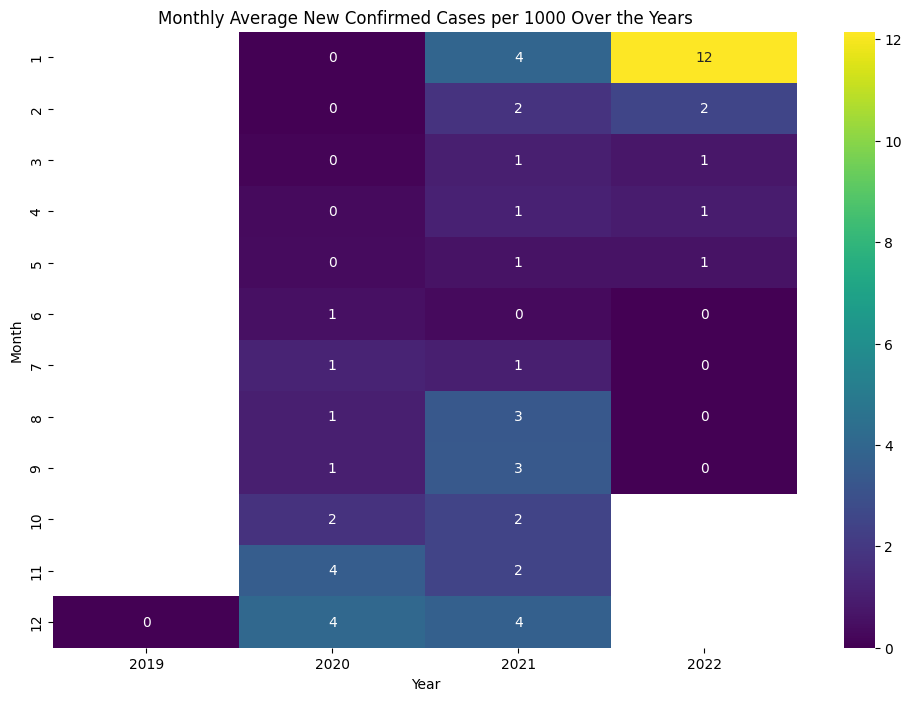

In [34]:
# Create a pivot table for heatmap
heatmap_data = weekly_df.pivot_table(values='new_confirmed_per_1000', index=weekly_df['week'].dt.month, columns=weekly_df['week'].dt.year, aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Monthly Average New Confirmed Cases per 1000 Over the Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()